In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LinearAlgebra,Interpolations,LazyGrids,LaTeXStrings,QuadGK,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

getEfieldInside (generic function with 1 method)

In [4]:
mat1 = material(1.33^2,1.0)
matSc = material(epstable("gold"),1.0)
mat2 = material(4.1^2,1.0);

In [5]:
matScatter = [mat1; matSc];

In [6]:
matScatter[2].k(2π/600)

0.002572056785923859 + 0.03216110588822106im

In [7]:
typeof(matScatter)

Vector{MaterialParams} (alias for Array{MaterialParams, 1})

In [8]:
xC = (0.0,0.0)
a = 50.0
N = 20
m = 2

2

In [9]:
cyl = cylinder(a,N,xC);

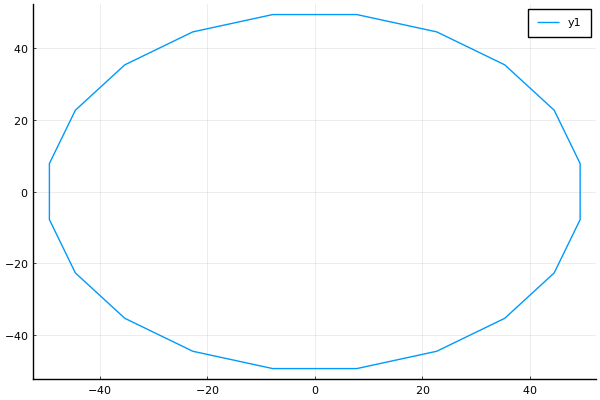

In [10]:
X,Y = getSurfPoints(cyl)

plot(X,Y)

In [11]:
λ = 520.
k0 = 2π/λ
Opt = "Homo"

"Homo"

In [12]:
Θ = cyl.circl.θArr;

In [13]:
Grf = GreenFunctions(matScatter,"Homo");

In [14]:
dThr,α = 50.,-90.;

In [15]:
A,B = getHϕ(m,cyl,k0,Grf,matSc.n,mat1.n,dThr,α);

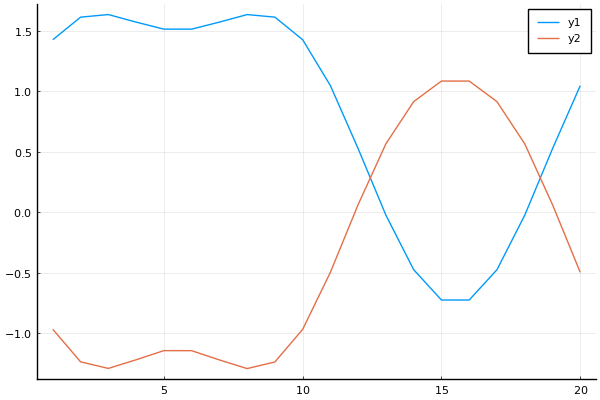

In [16]:
plot(real(A[:,1]))
plot!(real(B[:,1])./k0)

# ==================================================================

In [17]:
λA = 400.0:10.0:800.
k0A = 2π./λA;

In [23]:
@time σₐArr = getσₐ(m,k0A,matScatter,cyl,dThr,α);

 43.631117 seconds (558.12 M allocations: 19.377 GiB, 15.33% gc time)


In [28]:
@time σₑArr = getσₑ(m,k0A,matScatter,cyl,dThr,500,α);

 51.833642 seconds (559.33 M allocations: 19.422 GiB, 16.21% gc time, 1.80% compilation time)


In [29]:
@time σₛArr = getσₛ(m,k0A,matScatter,cyl,dThr,500,α);

 68.266652 seconds (1.00 G allocations: 32.466 GiB, 16.54% gc time, 0.37% compilation time)


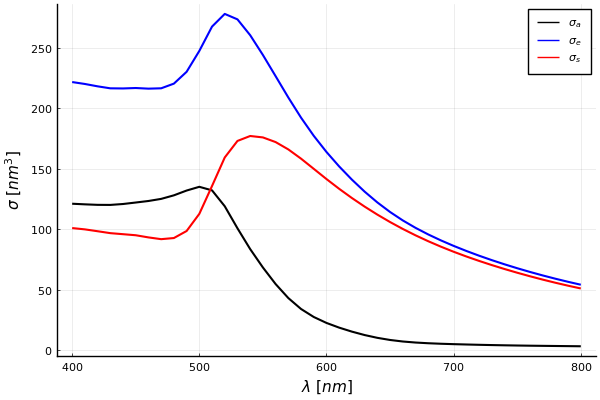

In [30]:
plot(2π./k0A,σₐArr,c=:black,lw=1.5,label=L"σ_a")
plot!(2π./k0A,σₑArr,c=:blue,lw=1.5,label=L"σ_e")
plot!(2π./k0A,σₛArr,c=:red,lw=1.5,label=L"σ_s",xlabel=L"\lambda~[nm]",ylabel=L"\sigma~[nm^3]")

# =======================================================

In [20]:
layer = layerstructure([mat1,mat2],[0.0,],"up");

In [21]:
SPar = SommerfieldParams(layer,2k0);

In [22]:
GrfL = GreenFunctions(matScatter,"Layer",k0=k0,SParms = SPar,xP = (500.,10),yP = (350.,10));